<a href="https://colab.research.google.com/github/KavyaChoudhary2008/project118/blob/main/class118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("stars.csv")

print(df.head())

fig = px.scatter(df, x="Size", y="Light")
fig.show()

        Size     Light
0   5.882677  1.325411
1  10.912830  3.183217
2   0.281190  0.620011
3   7.682623  1.804578
4  11.034071  3.390440


In [2]:
#WCSS- Within cluster Sum of squares
from sklearn.cluster import KMeans

X = df.iloc[:, [0, 1]].values

print(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

[[ 5.88267711  1.32541075]
 [10.91282974  3.18321731]
 [ 0.28118987  0.62001076]
 [ 7.68262274  1.80457756]
 [11.03407102  3.39044009]
 [ 0.84988347  0.82656157]
 [ 6.47346749  0.99997187]
 [12.17993641  4.37695642]
 [ 0.18253329  0.24372793]
 [ 7.56820956  1.31053068]
 [12.69679005  2.03584376]
 [ 0.02770377  0.64390611]
 [ 5.20021714  1.90392855]
 [14.84844867  9.20677086]
 [ 0.25906822  0.78305536]
 [ 6.1243438   1.1005551 ]
 [10.06301215  6.8423572 ]
 [ 0.50675639  0.74370214]
 [ 6.28221831  0.16934718]
 [14.025183    7.43555359]
 [ 0.05434116  0.19156329]
 [ 6.27626654  0.33758452]
 [10.31157448  9.41636235]
 [ 0.99958727  0.29189379]
 [ 5.22916552  0.02493252]
 [12.77452289  3.35990116]
 [ 0.99287173  0.27721941]
 [ 6.78203126  0.23741951]
 [12.73355738  4.98628931]
 [ 0.14092131  0.44453679]
 [ 5.08774426  0.3371882 ]
 [14.78157283  3.02636823]
 [ 0.20758125  0.40063895]
 [ 5.77421644  1.01817787]
 [14.42188085  5.06561331]
 [ 0.61217792  0.754544  ]
 [ 7.84657616  0.81794734]
 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

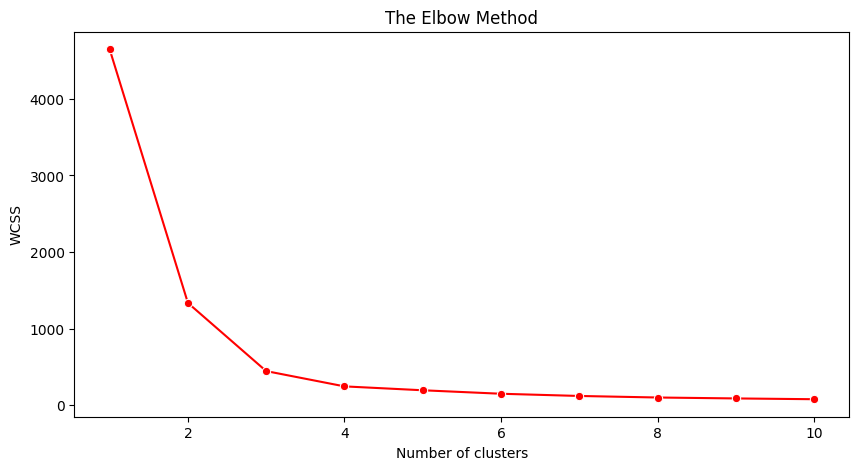

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(x=(range(1, 11)), y= wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print (y_kmeans)

[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2
 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [5]:
df["new_column"]=y_kmeans
df.head(10)

,Size,Light,new_column
0,5.882677,1.325411,0
1,10.912830,3.183217,1
2,0.281190,0.620011,2
3,7.682623,1.804578,0
4,11.034071,3.390440,1
5,0.849883,0.826562,2
6,6.473467,0.999972,0
7,12.179936,4.376956,1
8,0.182533,0.243728,2
9,7.568210,1.310531,0


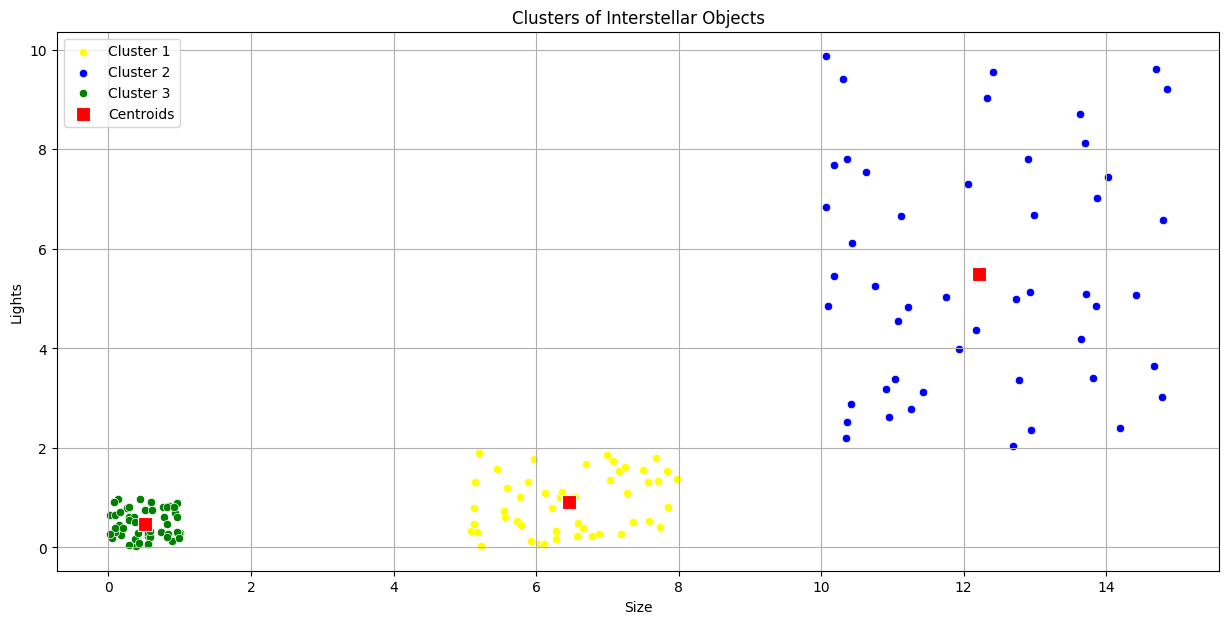

In [6]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= X[y_kmeans == 0, 0], y= X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1')
sns.scatterplot(x= X[y_kmeans == 1, 0], y= X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2')
sns.scatterplot(x= X[y_kmeans == 2, 0], y= X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3')
sns.scatterplot(x= kmeans.cluster_centers_[:, 0], y= kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=100,marker=',')
plt.grid(True)
plt.title('Clusters of Interstellar Objects')
plt.xlabel('Size')
plt.ylabel('Lights')
plt.legend()
plt.show()